# Pytorch Computer Vision

## 0. Computer Vision libraries in Pytorch

* `torchvision` - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems 
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for pytorch 
* `torch.utils.data.Dataloader` - creates a python iterable over a dataset

In [166]:
# import pytorch 
import torch 
from torch import nn

# import torchvision
import torchvision

# import matplotlib
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.0
0.19.0


## 1. Getting a dataset with [pytorch datasets](https://pytorch.org/vision/0.18/datasets.html)

The dataset: FashionMNIST - https://github.com/zalandoresearch/fashion-mnist

In [167]:
# setup training data 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root="data", # where to download the data to
    train=True,     # do we want the training dataset?
    download=True,      # do we want to download?
    transform=ToTensor(),     # how do we want to transform the data?
    target_transform=None       # how do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, # it's testing dataset
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [168]:
len(train_data), len(test_data)

(60000, 10000)

In [169]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [170]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [171]:
# check the labels 
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 check input and output shape of data

In [172]:
# check the shape
print(f"image shape: {image.shape} -> [color channels, height, width]")
print(f"image label: {label}")

image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
image label: 9


### 1.2 visualizing the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

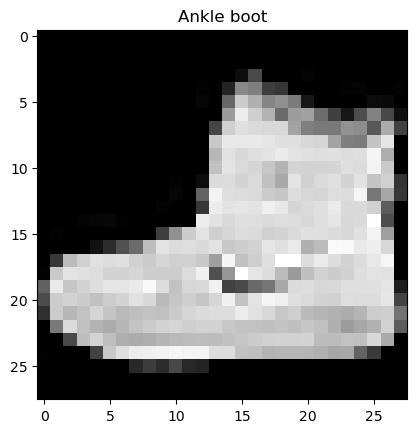

In [173]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray") 
plt.title(class_names[label])
# because matplotplib expects height and width first and the color channels at the last

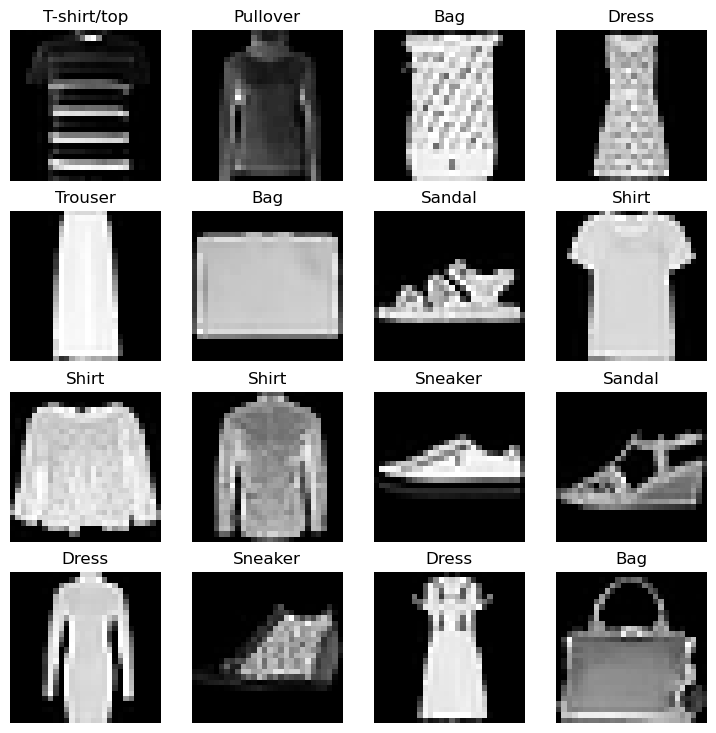

In [174]:
# plot more images 
torch.manual_seed(17)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [175]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare dataloader


Right now, our data is in the form of pytorch datasets.

Dataloader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches (mini-batches) -> turning data into group.

Reason?
1. It's more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60.000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch. 

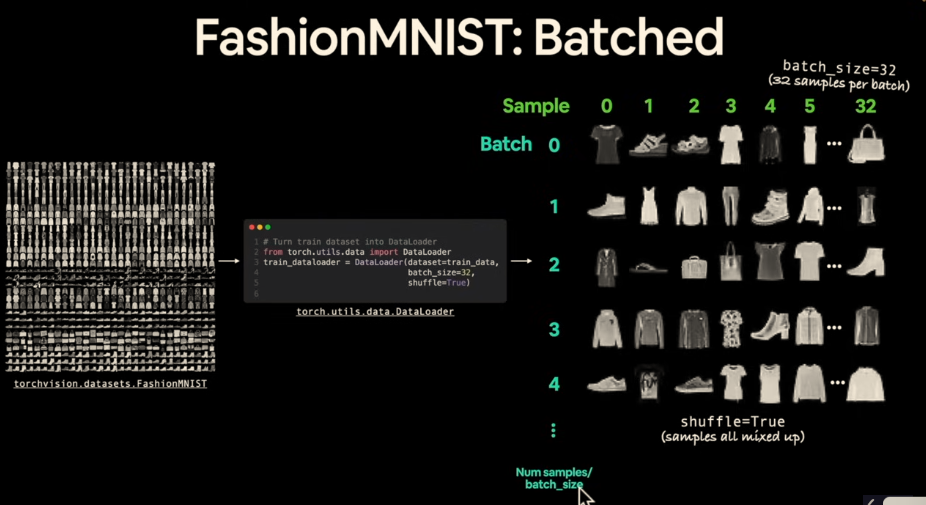

In [176]:
from torch.utils.data import DataLoader

# setup hyperparameter
BATCH_SIZE = 32

# turn datasets into batches
train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False)

len(train_dataloader) # 60.000 / 32

1875

In [177]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000025607E4B920>, <torch.utils.data.dataloader.DataLoader object at 0x0000025670E66660>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [178]:
# check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape # one batch

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'T-shirt/top')

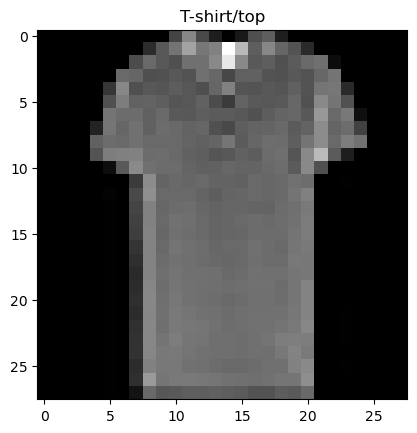

In [179]:
# show a sample
#torch.manual_seed(17)
random_idx = torch.randint(0, len(train_features_batch), size=[1]) # type: ignore
img, label = train_features_batch[random_idx], train_labels_batch[random_idx] # type: ignore
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])


## 3. Model 0: build a baseline model

When starting to build a series of machine learning modelling experiments, it;s best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: **start simply and add complexity when necessary**.

In [180]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a simple sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass 

print(f"Shape before flattening: {x.shape} -> [color channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color, channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color, channels, height*width]


In [181]:
# baseline model (trial-and-error)
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), # everything that goes into this layer stack will be flatten
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [182]:
torch.manual_seed(17)

model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28,
    output_shape=len(class_names),
    hidden_units=10
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [183]:
dummy_x = torch.randn([1, 1, 28, 28])
flatten_model(dummy_x).shape # same shape as the flattened size

torch.Size([1, 784])

### 3.1 setup loss, optimizer, and evaluation metrics 

* loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* optimizer - our optimizer `torch.optim.SGD()`
* evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [184]:
import requests 
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("the file already exists")
else:
    print("downloading the file")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f: # wb: write binary permission
        f.write(request.content)

the file already exists


In [185]:
# import accuracy metric
from helper_functions import accuracy_fn

# setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### 3.2 creating a function to time our experiments 

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs

In [186]:
from timeit import default_timer as timer 
def print_training_time(start: float,
                        end: float, 
                        device: torch.device = None):
    """prints difference between start and end time"""
    total_time = end - start 
    print(f"Training time on {device}: {total_time:.3f} seconds")
    return total_time

In [187]:
start_time = timer()
## some code
end_time = timer()
print_training_time(start_time, end_time, "cpu")

Training time on cpu: 0.000 seconds


1.9600032828748226e-05

### 3.3 creating a training loop and training a model on batches of data

1. loop through epochs 
2. loop through training batches, perform training steps, calculate the train loss *per batch*.
3. loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out what's happening
5. time it all

In [222]:
# import tqdm for progress bar
from tqdm.auto import tqdm 

# set the seed and start the timer
torch.manual_seed(17)
training_time_start_on_cpu = timer()

# set the number of epochs 
epochs = 3

# create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    ### training 
    train_loss = 0
    # add nested loop through the training batches
    for batch, (image, label) in enumerate(train_dataloader): # 1875 iterations
        model_0.train()
        # forward pass
        y_logits = model_0(image) # 32 images in one hit

        # 2. calculate the loss (per batch)
        loss = loss_fn(y_logits, label)
        train_loss += loss # accumulate the loss

        # 3. optimizer zero grad 
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step 
        optimizer.step()

        if batch % 400 == 0: 
            print(f"Looked at {batch * len(image)}/{len(train_dataloader.dataset)} samples.")
    
    # divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader) # the average loss of the total batches (1875)

    ### testing 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for image_test, label_test in test_dataloader:
            # forward pass 
            test_logits = model_0(image_test)

            # calculate the loss
            test_loss += loss_fn(test_logits, label_test)

            # calculate accuracy 
            test_acc += accuracy_fn(y_true=label_test, y_pred=test_logits.argmax(dim=1))
        
        # calculate the test loss average per batch 
        test_loss /= len(test_dataloader)

        # calculate the test acc average per batch 
        test_acc /= len(test_dataloader)
    
    # print out
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, test accuracy: {test_acc:.4f}")

# calcultae the training time 
training_time_end_on_cpu = timer()
total_training_time_model_0 = training_time_end_on_cpu - training_time_start_on_cpu
print_training_time(start=training_time_start_on_cpu, 
                    end=training_time_end_on_cpu, 
                    device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:10<00:20, 10.38s/it]


Train loss: 0.49662 | Test loss: 0.52236, test accuracy: 81.8291
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:20<00:10, 10.07s/it]


Train loss: 0.49662 | Test loss: 0.52236, test accuracy: 81.8291
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:30<00:00, 10.09s/it]


Train loss: 0.49662 | Test loss: 0.52236, test accuracy: 81.8291
Training time on cpu: 107.237 seconds


107.23675819998607

## 4. make predictions ang get model_0 results

In [189]:
import torch.utils

def eval_model(model: torch.nn.Module,
                data_loader: torch.utils.data,
                loss_fn, 
                accuracy_fn,
                device):   

    loss, accuracy = 0, 0 

    model.eval()
    with torch.inference_mode():
        for X, y  in tqdm(data_loader):
            # send the data to the target device
            X, y = X.to(device), y.to(device) 
            logits = model(X)
            loss += loss_fn(logits, y)

            accuracy += accuracy_fn(logits.argmax(dim=1), y)
        
        loss /= len(data_loader)
        accuracy /= len(data_loader)
    
    return{"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_accuracy": accuracy}

In [190]:
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device="cpu"
)
model_0_results

100%|██████████| 313/313 [00:01<00:00, 262.35it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5223580598831177,
 'model_accuracy': 81.82907348242811}

## 5. setup device agnostic code

In [191]:
!nvidia-smi

Mon Aug  5 11:31:39 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.70                 Driver Version: 560.70         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   57C    P8              1W /   50W |     216MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [192]:
device = "cuda" if torch.cuda.is_available else "cpu"
print(f"current device: {device}")

current device: cuda


## 6. Model 1: Building a better model with non-linearity

In [193]:
# FashionMNISTModelV1
# improvements: added non-linear activation for each linear layer

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape, out_shape, hidden_units = 10):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [194]:
torch.manual_seed(42)

model_v1 = FashionMNISTModelV1(input_shape=784, 
                                out_shape=len(class_names),
                                hidden_units=10).to(device)
model_v1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [195]:
# setup loss function and optimizer 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(),
                            lr=0.1)

In [196]:
# create training and testing loop of batch size 32

# start_time_on_gpu = timer()
# epochs = 10

# for epoch in tqdm(range(epochs)):

#     model_v1.train()
#     train_loss = 0
#     train_accuracy = 0
    
#     # X is equivalent to train_features_batch, and y is equivalent to train_labels_batch
#     for batch, (X, y) in enumerate(train_dataloader):
#         # send the data to the target device
#         X, y = X.to(device), y.to(device)

#         # feed forward 
#         logits = model_v1(X)

#         # calculate the loss and accuracy 
#         loss = loss_fn(logits, y)
#         train_loss += loss
#         train_accuracy += accuracy_fn(y_true=y, y_pred=logits.argmax(dim=1))

#         # optim zero grad 
#         optimizer.zero_grad()

#         # perform backpropagation and gradient descent for every batch
#         # backprop
#         loss.backward()

#         # gradient descent (optim step)
#         optimizer.step()

#         if batch % 400 == 0:
#             print(f"looked at {batch * 32}/{len(train_dataloader)*32} samples...")

#     train_loss /= len(train_dataloader)
#     train_accuracy /= len(train_dataloader)

#     test_loss, test_accuracy = 0, 0

#     model_v1.eval()
#     with torch.inference_mode():
#         for X_test, y_test in test_dataloader:
#             # send the data to the target device 
#             X_test, y_test = X_test.to(device), y_test.to(device)

#             # feed forward
#             test_logits = model_v1(X_test)

#             # calculate the loss and accuracy
#             test_loss += loss_fn(test_logits, y_test)
#             test_accuracy += accuracy_fn(y_true=y_test, y_pred=test_logits.argmax(dim=1))

#         # calculate the average for all batches       
#         test_loss /= len(test_dataloader)
#         test_accuracy /= len(test_dataloader)
#     print(f"Epoch: {epoch} | Train loss: {train_loss:.2f}, train accuracy: {train_accuracy:.5f} | Test loss: {test_loss:.2f}, test accuracy: {test_accuracy:.5f}")
# end_time_on_gpu = timer()
# print_training_time(start=start_time_on_gpu, end=end_time_on_gpu, device=str(next(model_v1.parameters()).device))


In [197]:
def training_step(model: torch.nn.Module,
                data_loader, 
                optimizer: torch.nn,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):
    # set model to training mode
    model.train()
    # set train_loss and train_accuracy
    train_loss, train_accuracy = 0, 0 

    for batch, (X, y) in enumerate(data_loader):
        # set the data to the device target
        X, y = X.to(device), y.to(device)

        # feed forward 
        logits = model(X)
        # calculate loss
        loss = loss_fn(logits, y)
        # calculate the accuracy
        train_accuracy += accuracy_fn(y_true=y, y_pred=logits.argmax(dim=1))

        # accumulate the loss value per batch 
        train_loss += loss 

        # optimizer zero grad 
        optimizer.zero_grad()

        # perform backpropagation
        loss.backward()

        # perform gradient descent 
        optimizer.step()

        if batch % 400 == 0: 
            print(f"looked at {batch * len(y)}/{len(train_dataloader) * 32} samples...")
    
    # calculate the average for every batch so that for every epoch there will be one single loss value and accuracy
    train_loss /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)
    print(f"Train loss: {train_loss:.2f}, train accuracy: {train_accuracy:.5f}")

In [198]:
def testing_step(model: torch.nn.Module, 
                data_loader: torch.utils.data.DataLoader, 
                loss_fn: torch.nn.Module, 
                accuracy_fn, 
                device: torch.device = device):
    test_loss, test_accuracy = 0, 0 
    
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # send the data to the target device 
            X_test, y_test = X_test.to(device), y_test.to(device)

            logits = model(X_test)
            test_loss += loss_fn(logits, y_test)
            test_accuracy += accuracy_fn(y_true=y_test, y_pred=logits.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_accuracy:.2f}")


### 6.1 replicate the training and testing loop in modular structure

sometimes you might find that your model trains faster in the CPU rather than in the GPU. This might be caused by some aspects, check out this article - https://horace.io/brrr_intro.html

In [199]:
torch.manual_seed(42)

start_time_on_gpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    training_step(model=model_v1, # type: ignore
                    data_loader=train_dataloader,
                    optimizer=optimizer,
                    loss_fn=loss_fn, 
                    accuracy_fn=accuracy_fn,
                    device=next(model_v1.parameters()).device)
    
    testing_step(model=model_v1, 
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn,
                    device=next(model_v1.parameters()).device)

end_time_on_gpu = timer()
total_training_time_model_v1 = end_time_on_gpu - start_time_on_gpu
print_training_time(start=start_time_on_gpu, end=end_time_on_gpu, device=str(next(model_v1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...
Train loss: 1.09, train accuracy: 61.34333


 33%|███▎      | 1/3 [00:06<00:13,  6.62s/it]

Test loss: 0.95636 | Test accuracy: 65.00
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...
Train loss: 0.78, train accuracy: 71.92833


 67%|██████▋   | 2/3 [00:13<00:06,  6.51s/it]

Test loss: 0.72227 | Test accuracy: 73.91
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...
Train loss: 0.67, train accuracy: 75.93667


100%|██████████| 3/3 [00:19<00:00,  6.52s/it]

Test loss: 0.68500 | Test accuracy: 75.02
Training time on cuda:0: 19.569 seconds


19.569495899952017

In [200]:
# get model_v1 results dictionary
model_v1_results = eval_model(model=model_v1,
                                data_loader=test_dataloader,
                                loss_fn=loss_fn,
                                accuracy_fn=accuracy_fn,
                                device=device)

model_v1_results

100%|██████████| 313/313 [00:00<00:00, 478.86it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_accuracy': 75.01996805111821}

## 7. Model 2: Building a Convolutional Neural Network

CNN'S are also known as ConvNets. They are known for their capabilities to find patterns in visual data.

Find out what's happening inside CNN - https://poloclub.github.io/cnn-explainer/

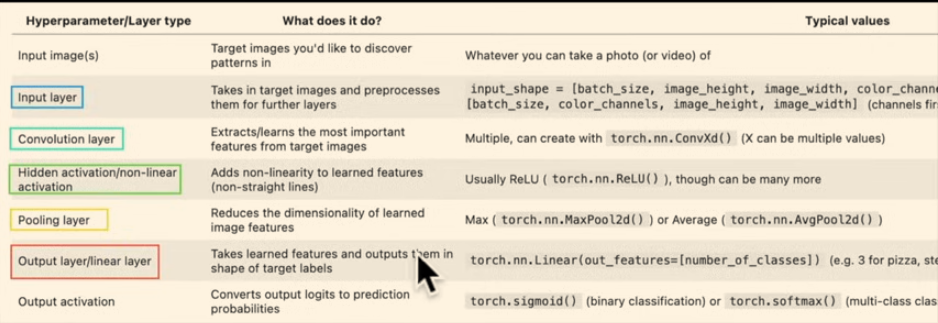

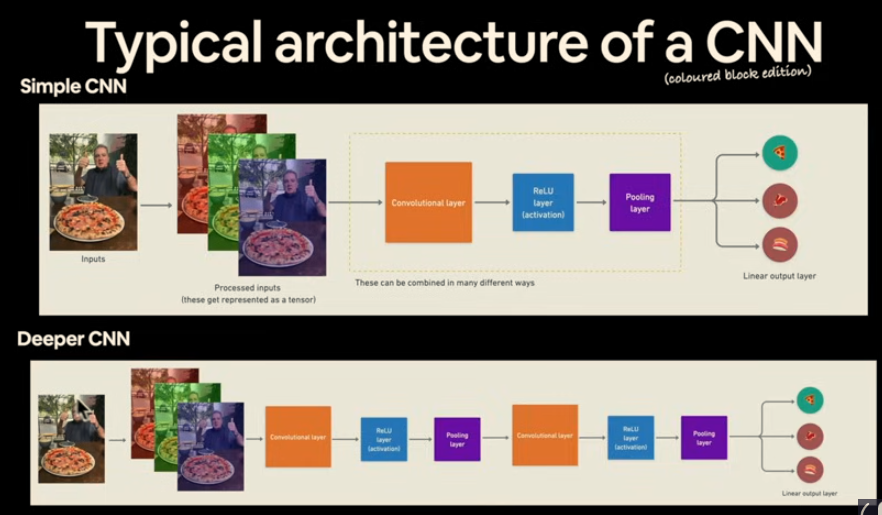

### 7.1 Replicating TinyVGG architecture

TinyVGG architecture

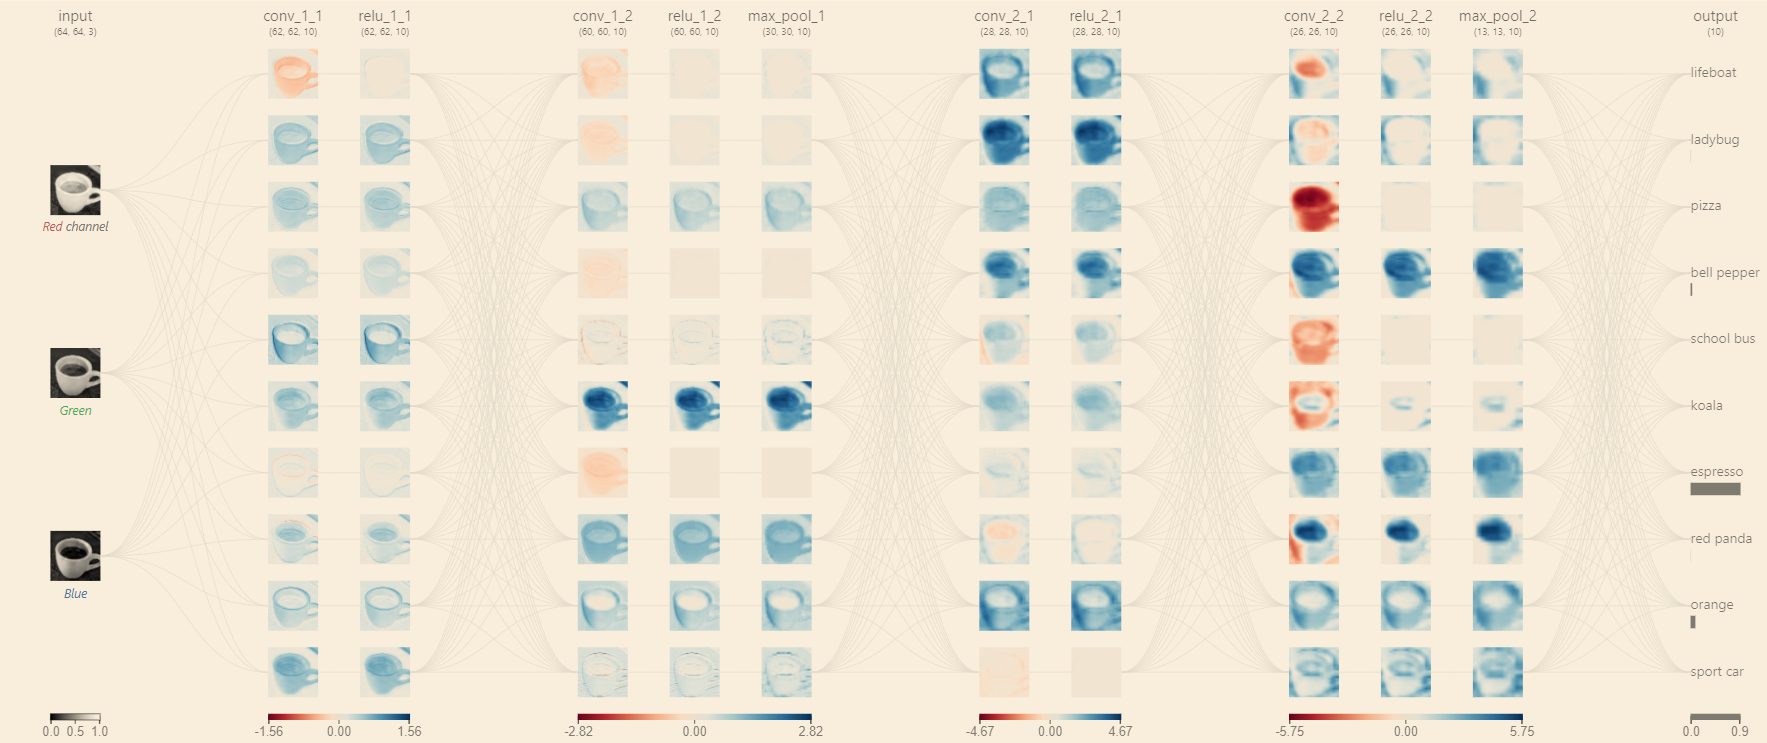

In [201]:
# create a convolutional neural network 
# using TinyVGG architecture
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            # add convolutional layers
            nn.Conv2d(in_channels=input_shape,
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units,
                        stride=1, 
                        kernel_size=3, 
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1), 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units,
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # follow the shape of conv_block_2 (outmost convolutional layer) the shape is (1, 10, 7, 7) -> 7*7*10 = 490
                        out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x) 
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x) 
        #print(f"Output classifier: {x.shape}")
        return x

In [202]:
image[0].shape # the number of color channel of this image is 1 since it's only black and white

torch.Size([1, 28, 28])

In [203]:
torch.manual_seed(17)
model_2 = FashionMNISTModelV2(input_shape=1, # number of color channels
                                hidden_units=10,
                                output_shape=len(class_names)).to(device)

### 7.2 breaking down nn.Conv2d

In [204]:
# create a dummy batch of images (32) with 3 color channels
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"dummy image shape: {test_image.shape}")

dummy image shape: torch.Size([3, 64, 64])


In [205]:
torch.manual_seed(17)
# create a single conv2d layer 
conv_layer = nn.Conv2d(in_channels=3, 
                        out_channels=10, 
                        kernel_size=(3, 3),
                        stride=1, 
                        padding=1)

# pass the data through the conv layer 
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.3 breaking down nn.MaxPool2d

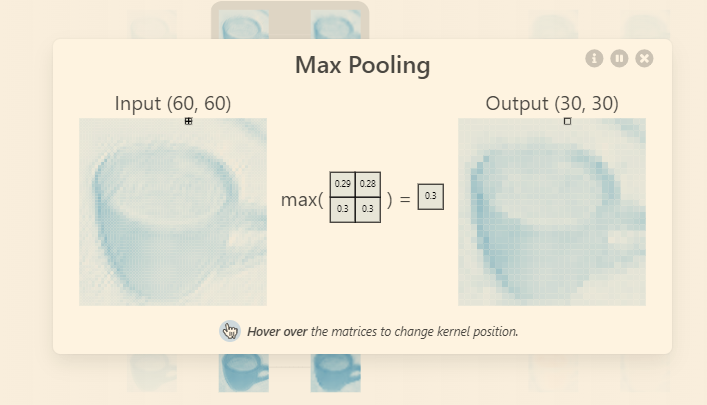
finding the max value of four numbers

In [206]:
# create a sample nn.MaxPool2d layer 
max_pool_layer = nn.MaxPool2d(kernel_size=(2, 2))

# pass data through just the conv_layer 
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# pass data through the max pool layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv and maxpool layer: {test_image_through_conv_and_maxpool.shape}")


Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through conv and maxpool layer: torch.Size([10, 32, 32])


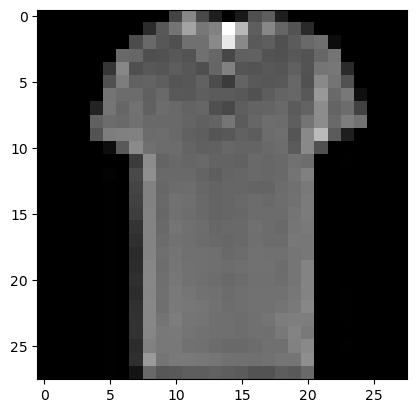

In [207]:
plt.imshow(img.squeeze(), cmap="gray")

In [208]:
# pass the image through the model
model_2(img.to(device))

tensor([[ 0.0323, -0.0365,  0.0094, -0.0457, -0.0364,  0.0509, -0.0012, -0.0274,
         -0.0332, -0.0569]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.4 setup a loss function and optimizer for model_2

In [209]:
# setup loss function, optimizer, and eval metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.5 Training and testing `model_2`

In [210]:
torch.manual_seed(17)
torch.cuda.manual_seed(17)

# setup training and testing loop
start_time_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    training_step(model=model_2, 
                    data_loader=train_dataloader,
                    optimizer=optimizer, 
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn,
                    device=device)
    
    testing_step(model=model_2,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn,
                    device=device)
end_time_on_gpu = timer()
total_training_time_model_2 = end_time_on_gpu - start_time_on_gpu
print_training_time(start=start_time_on_gpu, end=end_time_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...
Train loss: 0.63, train accuracy: 77.65833


 33%|███▎      | 1/3 [00:10<00:21, 10.97s/it]

Test loss: 0.39082 | Test accuracy: 86.58
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...
Train loss: 0.34, train accuracy: 88.05167


 67%|██████▋   | 2/3 [00:19<00:09,  9.74s/it]

Test loss: 0.35703 | Test accuracy: 87.50
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...
Train loss: 0.30, train accuracy: 89.24667


100%|██████████| 3/3 [00:28<00:00,  9.46s/it]

Test loss: 0.31463 | Test accuracy: 88.71
Training time on cuda: 28.376 seconds


28.376363499904983

In [211]:
# get the results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

100%|██████████| 313/313 [00:00<00:00, 418.48it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3146283030509949,
 'model_accuracy': 88.70806709265176}

## 8. comparing model results and training time

In [223]:
import pandas as pd 

compare_results = pd.DataFrame([
    model_0_results,
    model_v1_results,
    model_2_results
])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.522358,81.829073
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.314628,88.708067


In [224]:
compare_results["training time"] = [
    total_training_time_model_0,
    total_training_time_model_v1,
    total_training_time_model_2
]
compare_results

,model_name,model_loss,model_accuracy,training time
0,FashionMNISTModelV0,0.522358,81.829073,30.275605
1,FashionMNISTModelV1,0.685001,75.019968,19.569496
2,FashionMNISTModelV2,0.314628,88.708067,28.376363


Text(0, 0.5, 'model')

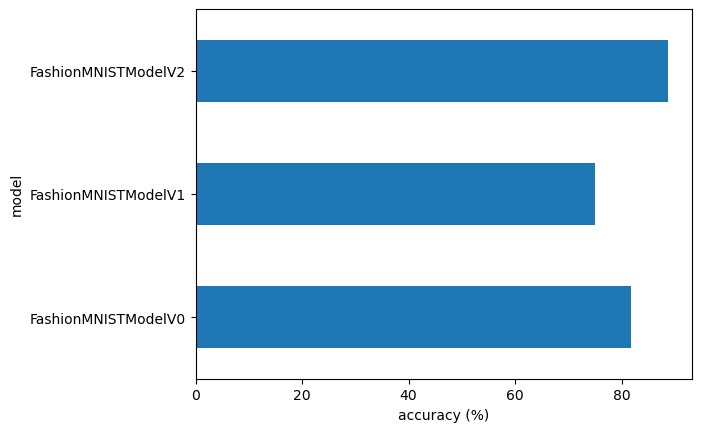

In [215]:
# visualize the model results
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. make an evaluate random predictions with best model

In [225]:
def make_predictions(model: torch.nn.Module, 
                        data: list, 
                        device: torch.device = device):
    # probability distributions (sum to 1)
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data: # data is a batch of 32 samples
            # prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device) # unsqueezing for adding one dimension in batch location by 1

            # forward pass (raw logits)
            pred_logits = model(sample)

            # get prediction probability (logits -> prediction probabilities)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # get pred prob off the gpu for further calculations
            pred_probs.append(pred_prob.cpu())
    
    # stack the pred probs to turn list into tensor 
    return torch.stack(pred_probs)

In [255]:
import random 
random.seed(10)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape 
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

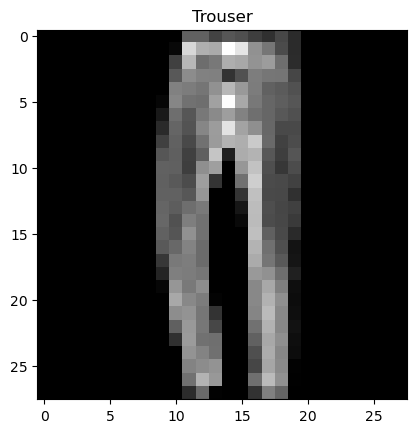

In [231]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [256]:
# make predictions 

pred_probs = make_predictions(model=model_2, 
                                data=test_samples)

# view the first two prediction probabilities 
pred_probs[:2]

tensor([[1.7405e-07, 9.0800e-11, 8.2667e-09, 2.0288e-08, 8.6330e-10, 9.9997e-01,
         4.9219e-08, 8.4300e-06, 2.1789e-05, 4.5821e-08],
        [5.2250e-04, 7.4832e-07, 4.1397e-05, 2.3310e-06, 5.7140e-05, 1.1346e-06,
         2.3659e-03, 1.3080e-04, 9.9678e-01, 1.0197e-04]])

In [257]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes_str = [class_names[pred_prob] for pred_prob in pred_classes]
pred_classes_str

['Sandal',
 'Bag',
 'Coat',
 'Coat',
 'T-shirt/top',
 'Pullover',
 'Bag',
 'Coat',
 'Dress']

In [258]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 8, 4, 4, 0, 2, 8, 4, 3])

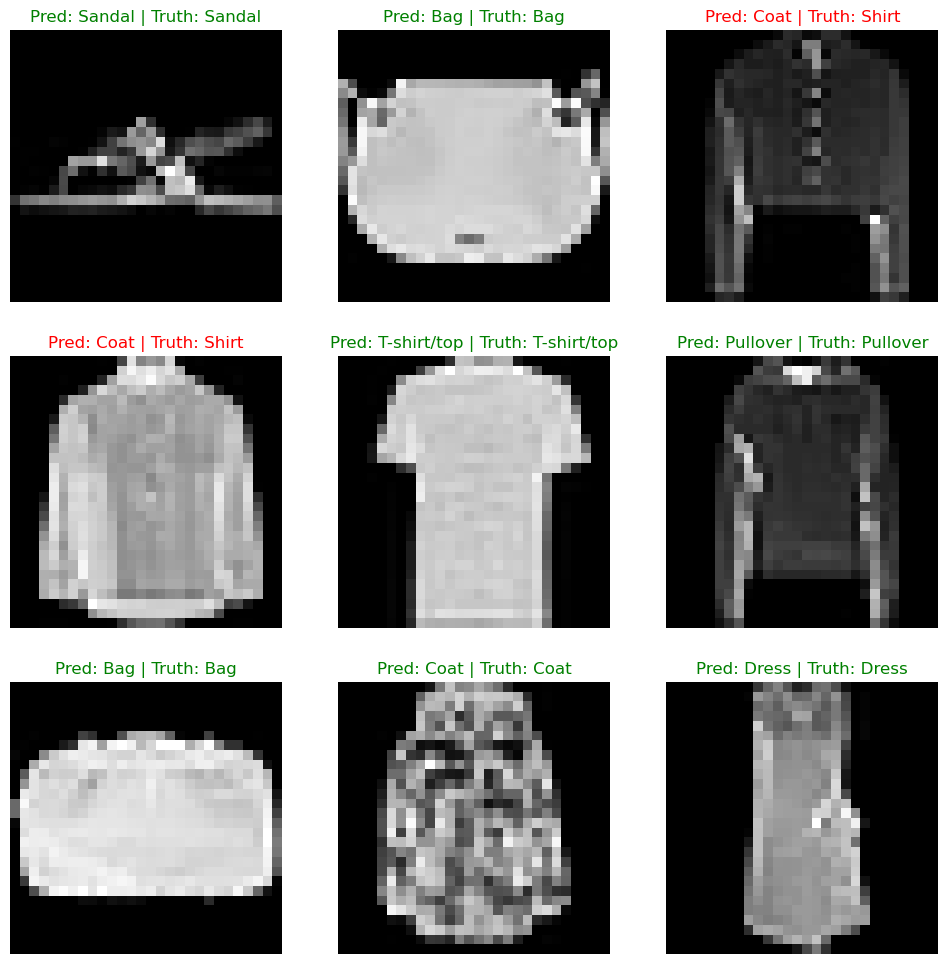

In [259]:
# plot predictions
plt.figure(figsize=(12, 12))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(nrows, ncols, i+1)
    # plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")
    # find the prediction label
    pred_label = class_names[pred_classes[i]]
    # get the truth label (in the text form)
    truth_label = class_names[test_labels[i]]
    # create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    # check for equality between pred and truth and change color of title text 
    if pred_label == truth_label:
        plt.title(title_text, c="g")
    else:
        plt.title(title_text, c="r")
    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is greay way of evaluating classification model visually:

1. Make predictions with our trained test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_consfusion_matrix()` - https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/


In [268]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # send the data to target device
        X, y = X.to(device), y.to(device)  
        # Forward pass 
        logits = model_2(X)
        # turn the logits into prediction labels (logits -> prediction probabilities -> prediction labels)
        y_pred = torch.softmax(logits, dim=0).argmax(dim=1)
        # append the predictio to y_preds 
        y_preds.append(y_pred.cpu())

# concatenate list of predictions into tensor 
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 361.66it/s]


tensor([9, 2, 1,  ..., 8, 1, 2])

In [270]:
import mlxtend # type: ignore
import torchmetrics

mlxtend.__version__, torchmetrics.__version__

('0.23.1', '1.4.0.post0')

In [271]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

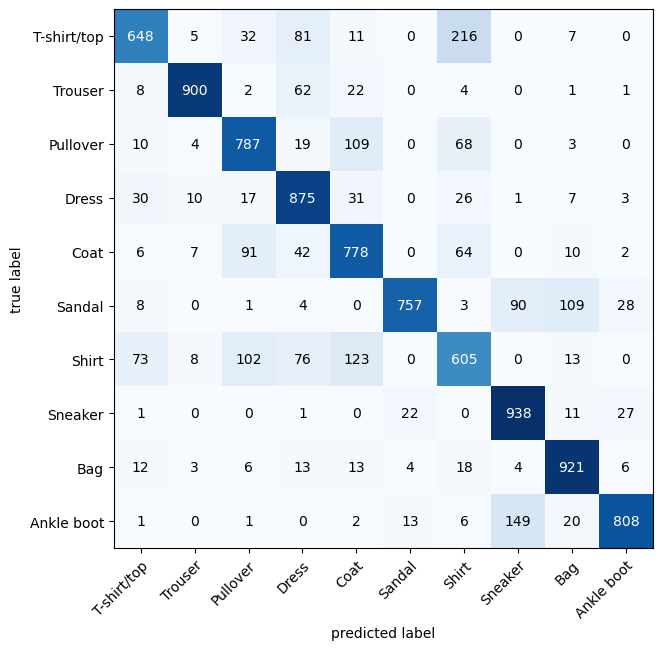

In [279]:
# 1. import all dependencies
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix # type: ignore

# 2. setup confusion instance and compare predictions to targets 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds_tensor, target=test_data.targets)

# 3. plot the confusion matrix 
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes to work with numpy
    class_names=class_names, 
    figsize=(10, 7)
)

In [278]:
confmat_tensor

tensor([[648,   5,  32,  81,  11,   0, 216,   0,   7,   0],
        [  8, 900,   2,  62,  22,   0,   4,   0,   1,   1],
        [ 10,   4, 787,  19, 109,   0,  68,   0,   3,   0],
        [ 30,  10,  17, 875,  31,   0,  26,   1,   7,   3],
        [  6,   7,  91,  42, 778,   0,  64,   0,  10,   2],
        [  8,   0,   1,   4,   0, 757,   3,  90, 109,  28],
        [ 73,   8, 102,  76, 123,   0, 605,   0,  13,   0],
        [  1,   0,   0,   1,   0,  22,   0, 938,  11,  27],
        [ 12,   3,   6,  13,  13,   4,  18,   4, 921,   6],
        [  1,   0,   1,   0,   2,  13,   6, 149,  20, 808]])

## 11. Saving and loading

In [280]:
# saving model state_dict
from pathlib import Path 

FILE_PATH = Path("models")
FILE_PATH.mkdir(parents=True, exist_ok=True)

FILE_NAME = "FashionMNISTV2.pt"
SAVE_PATH = FILE_PATH / FILE_NAME
torch.save(model_2.state_dict(), SAVE_PATH)

In [284]:
# loading model
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=SAVE_PATH))
loaded_model_2.to(device)

C:\Users\bolth\AppData\Local\Temp\ipykernel_13768\1624683511.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [287]:
loaded_model_2_result = eval_model(
    model=loaded_model_2, 
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_model_2_result

100%|██████████| 313/313 [00:01<00:00, 308.93it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3146283030509949,
 'model_accuracy': 88.70806709265176}

In [288]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
                torch.tensor(loaded_model_2_result["model_loss"]))

tensor(True)